## Case study approch.
1. Reading, understanding and visualising the data.
2. Preparing the data for modeling (train-test split, rescalling etc)
3. Building the model
    - Training the model
    - Testing the model
4. Predictions and evaluation on the test set

In [1]:
# Importing libraries and supress warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Set_option to avoid truncation of columns and rows:-
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Step 1:- Reading and understanding the data

In [3]:
# Read the data
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# seperating numeric and categorical columns
numeric_cols = ["Lead Number", "Converted", "TotalVisits", "Total Time Spent on Website", "Page Views Per Visit", "Asymmetrique Activity Score", "Asymmetrique Profile Score"]
categorical_cols = list(set(df.columns.to_list()).difference(set(numeric_cols)))

### Checking and Handaling missing values

In [8]:
for col in categorical_cols:
    print(10*"++")
    print(df[col].value_counts())

++++++++++++++++++++
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
++++++++++++++++++++
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64
++++++++++++++++++++
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
++++++++++++++++++++
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
++++++++++++++++++++
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64
++++++++++++++++++++
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked         

## observation :
 Where we are seeing some of the values have "select", which will appear when user not selected any option in form.

In [9]:
# Finding the columns having "Select" values
for cols in df.columns:
    if 'Select' in list(df[cols]):
        print(cols)


Specialization
How did you hear about X Education
Lead Profile
City


We got above 4 coulms, which contain "Select" value.

In [10]:
# Replacing "Select" value as Null in the above column
df['Specialization'].replace({'Select':None}, inplace=True)
df['How did you hear about X Education'].replace({'Select':None}, inplace=True)
df['Lead Profile'].replace({'Select':None}, inplace=True)
df['City'].replace({'Select':None}, inplace=True)

#### Missing Values Treatement

In [11]:
# Cheking percent of missing values in columns 
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('nulls').sort_values('nulls')

,nulls
Prospect ID,0.00
I agree to pay the amount through cheque,0.00
Get updates on DM Content,0.00
Update me on Supply Chain Content,0.00
Receive More Updates About Our Courses,0.00
Through Recommendations,0.00
Digital Advertisement,0.00
Newspaper,0.00
X Education Forums,0.00
A free copy of Mastering The Interview,0.00


Several columns, like "How did you hear about X Education," "Lead profile," and "Lead Quality," have a considerable number of missing values.

In [12]:
# Columns having more than 25% missing values
cols_25_per_missing_values = (df.columns[(round(100*(df.isnull().sum()/len(df.index)), 2)) >= 25]).tolist()
cols_25_per_missing_values

['Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [13]:
# Removing the columns having more than 25% missing values
df = df.drop(cols_25_per_missing_values,axis=1)

In [14]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

In [15]:
# Checking percent of missing values in columns agian
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('nulls').sort_values('nulls')

,nulls
Prospect ID,0.00
I agree to pay the amount through cheque,0.00
Get updates on DM Content,0.00
Update me on Supply Chain Content,0.00
Receive More Updates About Our Courses,0.00
Through Recommendations,0.00
Digital Advertisement,0.00
Newspaper,0.00
X Education Forums,0.00
Newspaper Article,0.00


In [16]:
# Removing the rows, where TotalVisits column is null
df = df[~np.isnan(df['TotalVisits'])]

In [17]:
# Lets again check the percent of missing values in columns 
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('nulls').sort_values('nulls')

,nulls
Prospect ID,0.00
I agree to pay the amount through cheque,0.00
Get updates on DM Content,0.00
Update me on Supply Chain Content,0.00
Receive More Updates About Our Courses,0.00
Through Recommendations,0.00
Digital Advertisement,0.00
Newspaper,0.00
X Education Forums,0.00
Newspaper Article,0.00


In [18]:
# Removing the rows, where Lead Source column is null
df = df[~pd.isnull(df['Lead Source'])]

In [19]:
# Lets again check the percent of missing values in columns 
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('nulls').sort_values('nulls')

,nulls
Prospect ID,0.0
I agree to pay the amount through cheque,0.0
Get updates on DM Content,0.0
Update me on Supply Chain Content,0.0
Receive More Updates About Our Courses,0.0
Through Recommendations,0.0
Digital Advertisement,0.0
Newspaper,0.0
X Education Forums,0.0
Newspaper Article,0.0


Now, no missing values in any columns and rows.

In [20]:
df.shape

(9074, 24)

### Outliers checking

In [21]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


### observation
Looking at the summary, it's clear that the columns 'TotalVisits,' 'Total Time Spent on Website,' and 'Page Views Per Visit' may have outliers. This suspicion arises from the substantial difference between the minimum and maximum values. We'll confirm this during our Exploratory Data Analysis (EDA) later on.

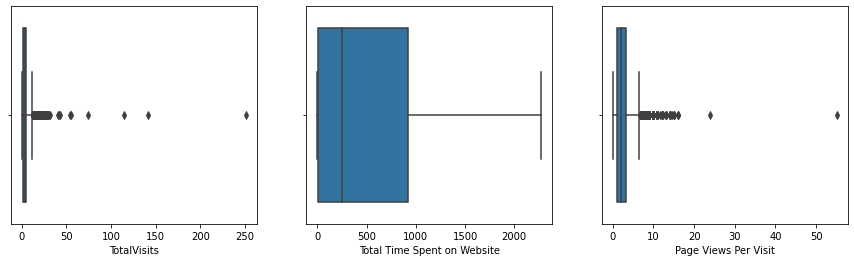

In [22]:
# Checking outliers
plt.figure(figsize=(15,4))
var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(var):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(x=i[1], data=df)

We've identified outliers in the "TotalVisits" and "Page Views Per Visit" columns, but not in the "Total Time Spent on Website" column. To address this, we'll be removing outliers at the 10th and 90th percentiles for the specified columns.

In [23]:
# Finding outliers in 'TotalVisits' and 'Page Views Per Visit' columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['TotalVisits','Page Views Per Visit']
for col in col_list_outlier: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df = df.loc[(df[col] > range_low) & (df[col] < range_high)]

df.shape

(8970, 24)

#### Average `Total Time Spent on Website` of the converted and not converted customers

In [24]:
# Converted time spent on website in hours
df_converted_avg_time_spent = df[df['Converted']==1]
Converted_time_spent = round((sum(df_converted_avg_time_spent['Total Time Spent on Website'])/len(df_converted_avg_time_spent.index))/60)
print("Converted_time_spent-",Converted_time_spent)

# Not Converted time spent on website in hours
df_not_converted_avg_time_spent = df[df['Converted']==0]
Not_Converted_time_spent = round((sum(df_not_converted_avg_time_spent['Total Time Spent on Website'])/len(df_not_converted_avg_time_spent.index))/60)
print("Not_Converted_time_spent-",Not_Converted_time_spent)

Converted_time_spent- 12
Not_Converted_time_spent- 5


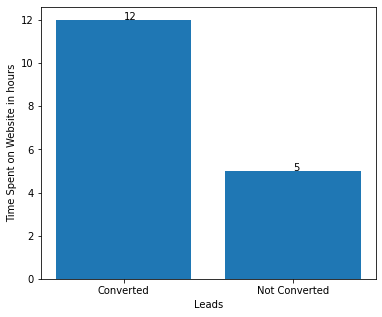

In [25]:
# Plotting
plt.figure(figsize=(6,5))
plt.bar(['Converted', 'Not Converted'], [Converted_time_spent, Not_Converted_time_spent])
plt.annotate(Converted_time_spent, xy=('Converted',Converted_time_spent))
plt.annotate(Not_Converted_time_spent, xy=('Not Converted',Not_Converted_time_spent))
plt.xlabel('Leads')
plt.ylabel('Time Spent on Website in hours')
plt.show()

#### Average `TotalVisits` of the converted and not converted customers

In [26]:
# Converted TotalVisits
df_converted_TotalVisits = df[df['Converted']==1]
Converted_TotalVisits = round(sum(df_converted_TotalVisits['TotalVisits'])/len(df_converted_TotalVisits.index),2)
print("Converted_TotalVisits-",Converted_TotalVisits)

# Not Converted TotalVisits
df_not_converted_TotalVisits = df[df['Converted']==0]
Not_Converted_TotalVisits = round(sum(df_not_converted_TotalVisits['TotalVisits'])/len(df_not_converted_TotalVisits.index),2)
print("Not_Converted_TotalVisits-",Not_Converted_TotalVisits)

Converted_TotalVisits- 3.38
Not_Converted_TotalVisits- 3.08


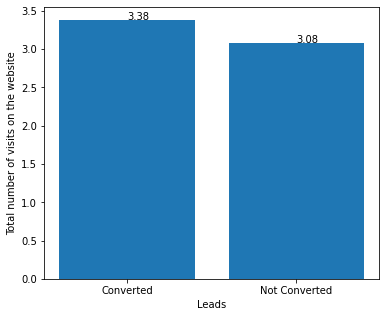

In [27]:
# Plotting
plt.figure(figsize=(6,5))
plt.bar(['Converted', 'Not Converted'], [Converted_TotalVisits, Not_Converted_TotalVisits])
plt.annotate(Converted_TotalVisits, xy=('Converted',Converted_TotalVisits))
plt.annotate(Not_Converted_TotalVisits, xy=('Not Converted',Not_Converted_TotalVisits))
plt.xlabel('Leads')
plt.ylabel('Total number of visits on the website')
plt.show()

We can see that there is not much difference of the Converted and Not-Converted customers based on their total number of visits on the website.

#### Average `Page Views Per Visit` of the converted and not converted customers

In [28]:
# Converted Page Views Per Visit
df_converted_page_views = df[df['Converted']==1]
Converted_page_views = round(sum(df_converted_page_views['Page Views Per Visit'])/len(df_converted_page_views.index),2)
print("Converted_page_views-",Converted_page_views)

# Not Converted Page Views Per Visit
df_not_converted_page_views = df[df['Converted']==0]
Not_Converted_page_views = round(sum(df_not_converted_page_views['Page Views Per Visit'])/len(df_not_converted_page_views.index),2)
print("Not_Converted_page_views-",Not_Converted_page_views)

Converted_page_views- 2.32
Not_Converted_page_views- 2.31


We can see that there is not much difference of the Converted and Not-Converted customers based on their Page Views Per Visit.

# Step-2 :- Preparing the data for modeling

### Checking Data Imbalance

### Checking the value counts of the categorical columns

###### Lead Origin

In [29]:
df['Lead Origin'].value_counts()

Landing Page Submission    4802
API                        3558
Lead Add Form               580
Lead Import                  30
Name: Lead Origin, dtype: int64

###### Lead Source

In [30]:
df['Lead Source'].value_counts()

Google               2846
Direct Traffic       2507
Olark Chat           1751
Organic Search       1116
Reference             442
Welingak Website      129
Referral Sites        120
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
youtubechannel          1
blog                    1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [31]:
# We see that "Google" and "google" considers a different values.
# Changing "google" to "Google"
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')


In the "Lead Source" column, there are some values like 'testone,' 'youtubechannel,' and others with very low counts. Additionally, 'Facebook' has comparatively low counts. To simplify and group these, we are combining such unique values into a category named 'Other.'

In [32]:
# Combining the lower counts in "Other"

df = df.replace({'Lead Source': {'Facebook':'Other', 'bing':'Other', 'Click2call':'Other', 'Live Chat':'Other',
                                          'Social Media':'Other', 'Press_Release':'Other', 'Pay per Click Ads':'Other',
                                          'WeLearn':'Other', 'WeLearn':'Other', 'youtubechannel':'Other', 'NC_EDM':'Other',
                                          'blog':'Other', 'testone':'Other', 'welearnblog_Home':'Other'}})

In [33]:
# Lets check the count again for Lead Scource
df['Lead Source'].value_counts()

Google              2851
Direct Traffic      2507
Olark Chat          1751
Organic Search      1116
Reference            442
Welingak Website     129
Referral Sites       120
Other                 54
Name: Lead Source, dtype: int64

###### Do Not Email

In [34]:
df['Do Not Email'].value_counts()

No     8274
Yes     696
Name: Do Not Email, dtype: int64

###### Do Not Call

In [35]:
df['Do Not Call'].value_counts()

No     8968
Yes       2
Name: Do Not Call, dtype: int64

###### Last Activity

In [36]:
df['Last Activity'].value_counts()

Email Opened                    3401
SMS Sent                        2695
Olark Chat Conversation          968
Page Visited on Website          600
Converted to Lead                428
Email Bounced                    311
Email Link Clicked               266
Form Submitted on Website        114
Unreachable                       88
Unsubscribed                      59
Had a Phone Conversation          24
View in browser link Clicked       5
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In the `Last Activity` column, certain values, like `Resubscribed to emails,` have very low counts. To streamline and simplify, we are grouping these unique values under a category named 'Other.'

In [37]:
# Combining the lower counts in "Other"
df = df.replace({'Last Activity':{'Had a Phone Conversation':'Other', 'View in browser link Clicked':'Other',
                                 'Approached upfront':'Other', 'Email Received':'Other', 'Email Marked Spam':'Other',
                                 'Visited Booth in Tradeshow':'Other', 'Resubscribed to emails':'Other'}})

In [38]:
df['Last Activity'].value_counts()

Email Opened                 3401
SMS Sent                     2695
Olark Chat Conversation       968
Page Visited on Website       600
Converted to Lead             428
Email Bounced                 311
Email Link Clicked            266
Form Submitted on Website     114
Unreachable                    88
Unsubscribed                   59
Other                          40
Name: Last Activity, dtype: int64

In [39]:
df['Search'].value_counts()

No     8957
Yes      13
Name: Search, dtype: int64

In [40]:
df['Magazine'].value_counts()

No    8970
Name: Magazine, dtype: int64

In [41]:
df['Newspaper Article'].value_counts()

No     8969
Yes       1
Name: Newspaper Article, dtype: int64

In [42]:
df['X Education Forums'].value_counts()

No    8970
Name: X Education Forums, dtype: int64

In [43]:
df['Newspaper'].value_counts()

No     8969
Yes       1
Name: Newspaper, dtype: int64

In [44]:
df['Digital Advertisement'].value_counts()

No     8967
Yes       3
Name: Digital Advertisement, dtype: int64

In [45]:
df['Through Recommendations'].value_counts()

No     8964
Yes       6
Name: Through Recommendations, dtype: int64

In [46]:
df['Receive More Updates About Our Courses'].value_counts()

No    8970
Name: Receive More Updates About Our Courses, dtype: int64

In [47]:
df['Update me on Supply Chain Content'].value_counts()

No    8970
Name: Update me on Supply Chain Content, dtype: int64

In [48]:
df['Get updates on DM Content'].value_counts()

No    8970
Name: Get updates on DM Content, dtype: int64

In [49]:
df['I agree to pay the amount through cheque'].value_counts()

No    8970
Name: I agree to pay the amount through cheque, dtype: int64

In [50]:
df['A free copy of Mastering The Interview'].value_counts()

No     6146
Yes    2824
Name: A free copy of Mastering The Interview, dtype: int64

###### Last Notable Activity

In [51]:
df['Last Notable Activity'].value_counts()

Modified                        3240
Email Opened                    2796
SMS Sent                        2135
Page Visited on Website          289
Olark Chat Conversation          182
Email Link Clicked               172
Email Bounced                     59
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Resubscribed to emails             1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

In the `Last Notable Activity` column, a few values, such as `Form Submitted on Website`, have very low counts. We are consolidating these unique values under a category named `Other`.

In [52]:
# # Combining the lower counts in "Other"
df = df.replace({'Last Notable Activity':{'Unreachable':'Other', 'Had a Phone Conversation':'Other', 'Email Marked Spam':'Other',
                                         'View in browser link Clicked':'Other','Email Received':'Other',
                                         'Approached upfront':'Other','Resubscribed to emails':'Other',
                                         'Resubscribed to emails':'Other','Form Submitted on Website':'Other'}})

In [53]:
# lets check the count again
df['Last Notable Activity'].value_counts()

Modified                   3240
Email Opened               2796
SMS Sent                   2135
Page Visited on Website     289
Olark Chat Conversation     182
Email Link Clicked          172
Email Bounced                59
Other                        52
Unsubscribed                 45
Name: Last Notable Activity, dtype: int64

#### Dropping few coulms having only one type of values


We observe that in the following columns, the count of 'Yes' is either very low (almost negligible) or there is no "Yes" value. Consequently, these columns do not significantly contribute to our analysis and model building. Therefore, we can remove these columns from our dataset.

    'Do Not Call' - Yes count = 2
    'Search' - Yes count = 13
    'Magazine' - Yes count = 0
    'Newspaper Article' - Yes count = 1
    'X Education Forums' - Yes count = 0
    'Newspaper' - Yes count = 1
    'Digital Advertisement' - Yes count = 3
    'Through Recommendations' - Yes count = 6
    'Receive More Updates About Our Courses' - Yes count = 0
    'Update me on Supply Chain Content' - Yes count = 0
    'Get updates on DM Content' - Yes count = 0
    'I agree to pay the amount through cheque' - Yes count = 0

In [54]:
df = df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
             'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
             'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque' ], axis=1)

In [55]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,No,Modified


#### Converting some binary variables (Yes/No) to 1/0

In [56]:
varlist = ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

df[varlist] = df[varlist].apply(binary_map)

In [57]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified


### For categorical variables with multiple levels, create dummy features

Doing the following:-
1. We're creating dummy variables for categorical columns that have multiple levels.
2. If a dummy column has very few values, we're dropping it to keep things concise.
3. In some columns, the "Other" values are rare, so we're removing the corresponding "Other" dummy column.

In [58]:
# Creating dummy variables for the categorical variables and dropping the level with low numbe of occurance.

# Creating dummy variables for the variable 'Lead Origin'
lo = pd.get_dummies(df['Lead Origin'], prefix='Lead Origin')
# Dropping Lead Origin_Lead Import column
lo = lo.drop('Lead Origin_Lead Import', axis=1)
# Adding the result to the master df
df = pd.concat([df, lo], axis=1)


# Creating dummy variables for the variable 'Lead Source'
ls = pd.get_dummies(df['Lead Source'], prefix='Lead Source')
# Dropping Lead Source_Other dummy column
ls = ls.drop('Lead Source_Other', axis=1)
# Adding the result to the master df
df = pd.concat([df, ls], axis=1)

# Creating dummy variables for the variable 'Last Activity'
la = pd.get_dummies(df['Last Activity'], prefix='Last Activity')
# Dropping Last Activity_Other dummy column
la = la.drop('Last Activity_Other', axis=1)
# Adding the result to the master df
df = pd.concat([df, la], axis=1)


# Creating dummy variables for the variable 'Last Notable Activity'
ln = pd.get_dummies(df['Last Notable Activity'], prefix='Last Notable Activity')
# Dropping Last Notable Activity_Other dummy column
ln = ln.drop('Last Notable Activity_Other', axis=1)
# Adding the result to the master df
df = pd.concat([df, ln], axis=1)

In [59]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Dropping the original repeated variables

In [60]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], axis=1)

In [61]:
df.shape

(8970, 36)

Finally we have 36 columns in the dataset.

##### Checking how many are converted in the dataset

In [62]:
df['Converted'].value_counts()

0    5579
1    3391
Name: Converted, dtype: int64

Text(0, 0.5, 'Count')

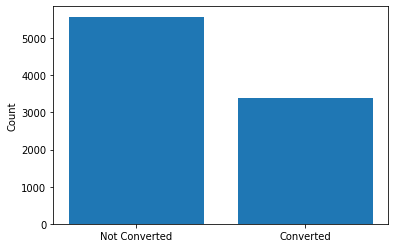

In [63]:
plt.bar(['Not Converted', 'Converted'], [df['Converted'].value_counts()[0], df['Converted'].value_counts()[1]])
plt.ylabel('Count')

In [64]:
# Checking the converted rate
round(((sum(df['Converted'])/len(df.index))*100),2)

37.8

We see that there is a balanced converted and non converted ratio in the dataset. Around 38% customers are converted.

## Test-Train Split

In [65]:
# Import library
from sklearn.model_selection import train_test_split

In [66]:
# Putting feature variables to X
X = df.drop(['Prospect ID', 'Lead Number', 'Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [67]:
# Putting target variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [68]:
# Splitting data into train and test set with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [69]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [70]:
# Instantiate the scaler
scaler = StandardScaler()
# We're only scaling the numeric variables in this process. No scaling is needed for binary variables since they are already encoded as 0 and 1.
# Fit the data into scaler and transform
X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
3825,0,-1.086657,-0.885830,-1.155787,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3307,0,0.285997,1.481982,0.848717,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5527,0,-1.086657,-0.885830,-1.155787,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
5180,0,-1.086657,-0.885830,-1.155787,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7064,0,1.315488,1.410174,2.352095,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Looking at Correlations

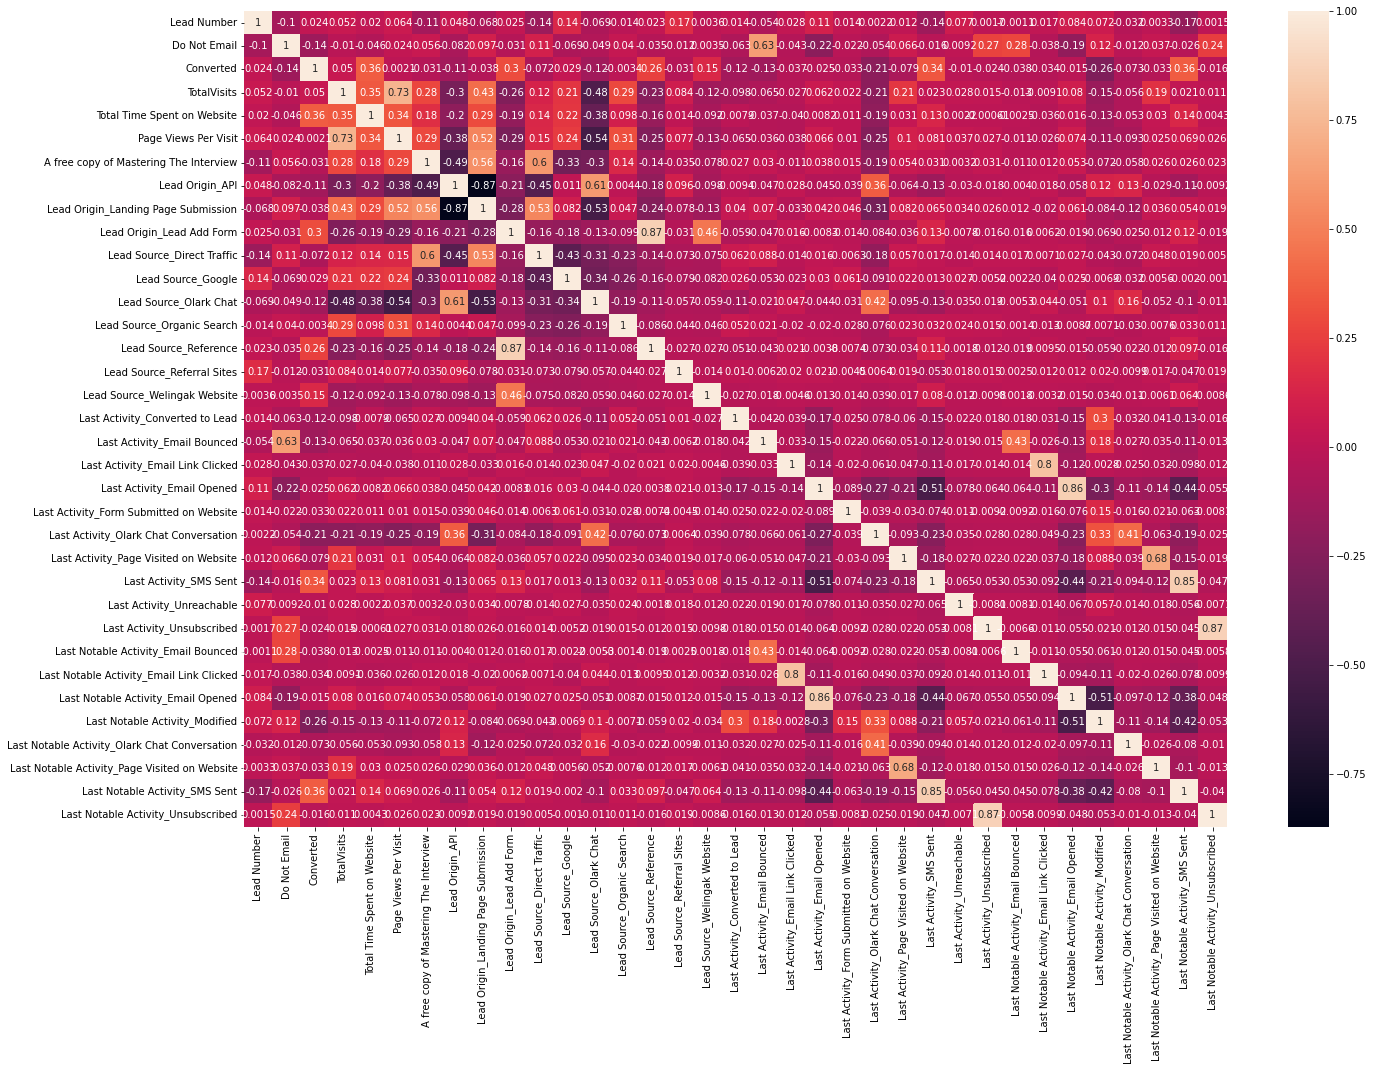

In [71]:
plt.figure(figsize=(22,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

###### Highly correlated dummy variables

    Last Notable Activity_Email Link Clicked and Last Activity_Email Link Clicked: Correlation = 0.8
    Last Notable Activity_Email Opened and Last Activity_Email Opened: Correlation = 0.86
    Last Notable Activity_Page Visited on Website and Last Activity_Page Visited on Website: Correlation = 0.68
    Last Notable Activity_SMS Sent and Last Activity_SMS Sent: Correlation = 0.85
    Last Notable Activity_Unsubscribed and Last Activity_Unsubscribed: Correlation = 0.87
    Last Notable Activity_Olark Chat Conversation and Last Activity_Olark Chat Conversation: Correlation = 0.41
    Last Notable Activity_Email Bounced and Last Activity_Email Bounced: Correlation = 0.43
    Lead Origin_API and Lead Origin_Landing Page Submission: Correlation = -0.87
    Lead Origin_API and Lead Source_Olark Chat: Correlation = 0.61
    Lead Origin_Lead Add Form and Lead Source_Reference: Correlation = 0.87

#### Dropping correlated variables dummy variables

In [72]:
# Dropping from train set
X_train = X_train.drop(['Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Page Visited on Website',
                       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed',
                       'Lead Origin_API', 'Lead Origin_Lead Add Form'], axis=1)

# Dropping from test set
X_test = X_test.drop(['Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Email Opened', 'Last Notable Activity_Page Visited on Website',
                       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed', 
                        'Lead Origin_API', 'Lead Origin_Lead Add Form'], axis=1)

In [73]:
X_train.shape

(6279, 26)

In [74]:
X_test.shape

(2691, 26)

##### Lets check the correlation again

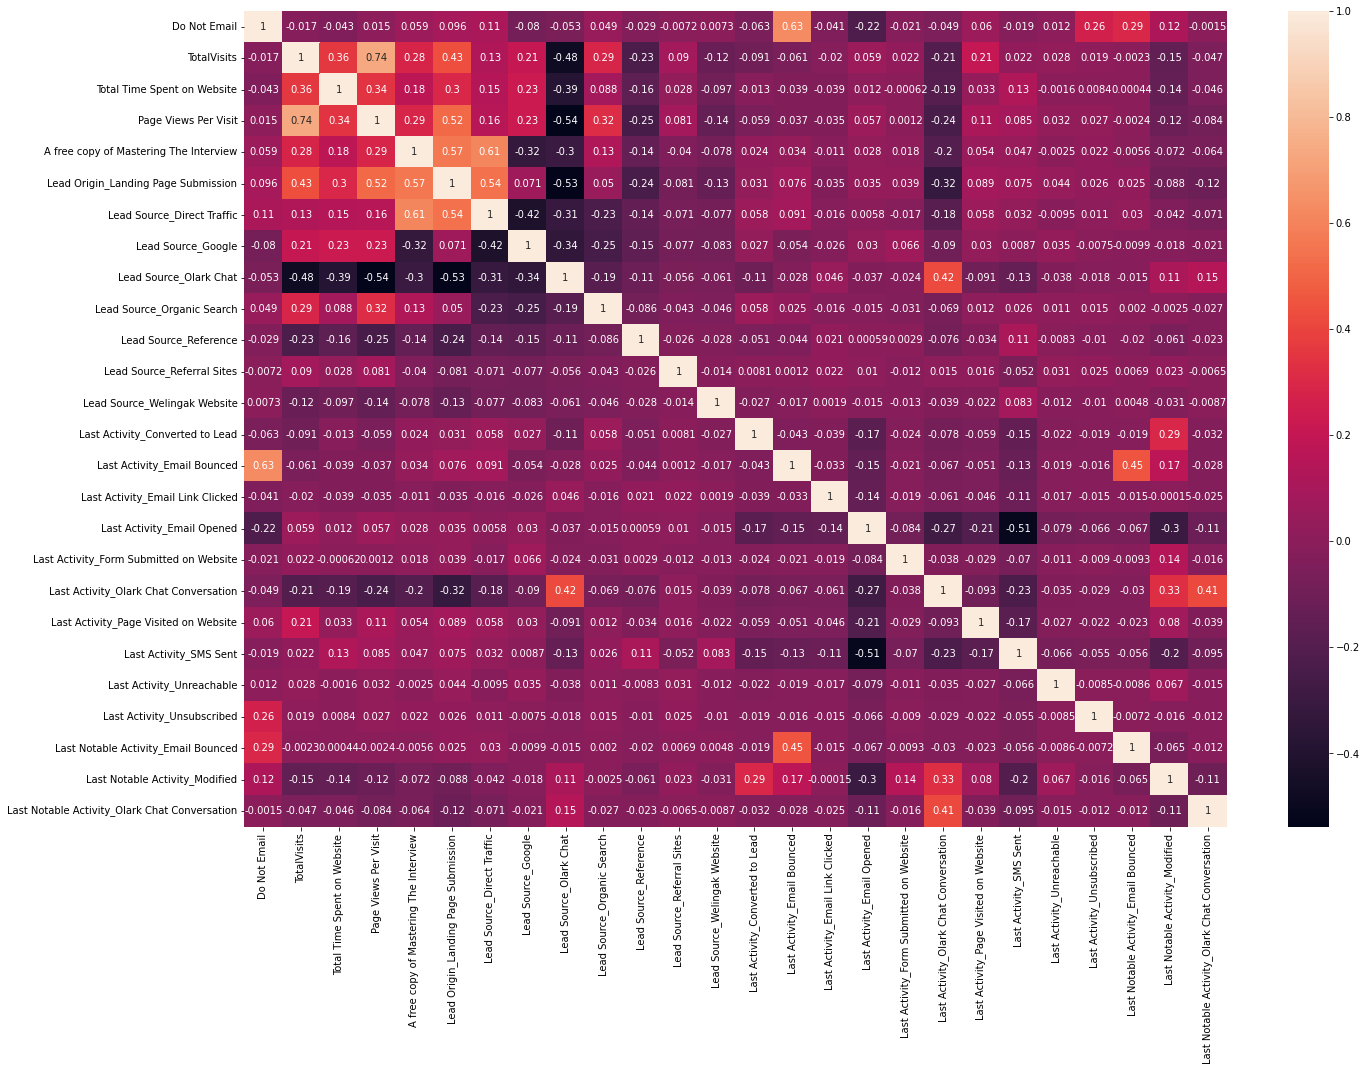

In [75]:
plt.figure(figsize=(22,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

# Step-3:- Building the model

## Training the model

In [76]:
# Import statsmodel
import statsmodels.api as sm

### Model-1

In [77]:
# Instantiate the model
logm1 = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
# Fit the model
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.9
Date:                Tue, 21 Nov 2023   Deviance:                       5545.7
Time:                        19:36:37   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.9023      0.566      3.358      0.001       0.792       3.013
Do Not Email                                     -1.2136      0.205     -5.933      0.000      -1.614      -0.813
TotalVisits                                       0.2423      0.051      4.792      0.000       0.143       0.341
Total Time Spent on Website                       1.1147      0.039     28.257      0.000       1.037       1.192
Page Views Per Visit                             -0.1884      0.054     -3.512      0.000      -0.294      -0.083
A free copy of Mastering The Interview            0.0260      0.103      0.253      0.800      -0.175       0.227
Lead Origin_Landing Page Submission              -0.1273      0.103     -1.240      0.215      -0.328       0.074
Lead Source_Direct Traffic                       -1.0494      0.375     -2.802      0.005      -1.783      -0.315
Lead Source_Google                               -0.6702      0.367     -1.828      0.068      -1.389       0.048
Lead Source_Olark Chat                            0.2281      0.367      0.622      0.534      -0.491       0.947
Lead Source_Organic Search                       -0.8546      0.378     -2.259      0.024      -1.596      -0.113
Lead Source_Reference                             3.4407      0.425      8.103      0.000       2.608       4.273
Lead Source_Referral Sites                       -1.0424      0.473     -2.203      0.028      -1.970      -0.115
Lead Source_Welingak Website                      4.7275      0.807      5.859      0.000       3.146       6.309
Last Activity_Converted to Lead                  -2.5857      0.482     -5.362      0.000      -3.531      -1.640
Last Activity_Email Bounced                      -2.7741      0.662     -4.192      0.000      -4.071      -1.477
Last Activity_Email Link Clicked                 -2.3703      0.477     -4.971      0.000      -3.305      -1.436
Last Activity_Email Opened                       -1.9459      0.437     -4.449      0.000      -2.803      -1.089
Last Activity_Form Submitted on Website          -2.2216      0.555     -4.003      0.000      -3.309      -1.134
Last Activity_Olark Chat Conversation            -3.0779      0.469     -6.566      0.000      -3.997      -2.159
Last Activity_Page Visited on Website            -2.3225      0.455     -5.099      0.000      -3.215      -1.430
Last Activity_SMS Sent                           -0.7422      0.438     -1.696      0.090      -1.600       0.115
Last Activity_Unreachable                        -1.4723      0.538     -2.735      0.006      -2.527      -0.417
Last Activity_Unsubscribed                       -1.2201      0.614     -1.986      0.047      -2.424      -0.016
Last 

***Model analysis***
1. We can see that there are few features have positive coefficients and few have negative.
2. Few features have higher p-values and hence became insignificant in the model.

***Coarse tuning (Auto+Manual)***

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [78]:
# Importing scikit learn linear model as stats model will not work with RFE
from sklearn.linear_model import LogisticRegression
# Instantiate logistice regression model
logreg = LogisticRegression()

###### RFE with 15 coulmns

In [79]:
# Importing RFE
from sklearn.feature_selection import RFE
# Instantiate RFE with 15 columns
rfe = RFE(logreg, 15)
# Fit the train set
rfe = rfe.fit(X_train, y_train)

In [80]:
# Listing the feature variables with their RFE status and rank 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 11),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', False, 10),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Last Activity_SMS Sent', False, 4),
 ('Last Activity_Unreachable', False, 8),
 ('Last Activity_Unsubscribed', False, 12),
 ('Last N

In [81]:
# RFE selected columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Organic Search', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Welingak Website', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website'], dtype='object')

In [82]:
# RFE not selected columns
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Source_Olark Chat', 'Last Activity_SMS Sent', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'Last Notable Activity_Email Bounced', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation'], dtype='object')

### Model-2
With all RFE variables.

In [83]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train[col])
# Instantiate the model
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
# Fit the model
log_model_2 = logm2.fit()
log_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6279
Model:                            GLM   Df Residuals:                     6263
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2840.3
Date:                Tue, 21 Nov 2023   Deviance:                       5680.7
Time:                        19:36:40   Pearson chi2:                 6.46e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.1356      0.097     11.685      0.000       0.945       1.326
Do Not Email                               -1.3403      0.182     -7.381      0.000      -1.696      -0.984
Total Time Spent on Website                 1.1267      0.039     28.981      0.000       1.050       1.203
Lead Source_Direct Traffic                 -1.3241      0.110    -12.045      0.000      -1.540      -1.109
Lead Source_Google                         -0.9545      0.105     -9.105      0.000      -1.160      -0.749
Lead Source_Organic Search                 -1.0773      0.128     -8.438      0.000      -1.328      -0.827
Lead Source_Reference                       3.1268      0.237     13.183      0.000       2.662       3.592
Lead Source_Referral Sites                 -1.2794      0.310     -4.125      0.000      -1.887      -0.672
Lead Source_Welingak Website                4.5256      0.729      6.204      0.000       3.096       5.955
Last Activity_Converted to Lead            -2.4484      0.214    -11.439      0.000      -2.868      -2.029
Last Activity_Email Bounced                -1.8597      0.347     -5.353      0.000      -2.541      -1.179
Last Activity_Email Link Clicked           -1.6500      0.209     -7.885      0.000      -2.060      -1.240
Last Activity_Email Opened                 -1.1030      0.075    -14.687      0.000      -1.250      -0.956
Last Activity_Form Submitted on Website    -1.9713      0.346     -5.694      0.000      -2.650      -1.293
Last Activity_Olark Chat Conversation      -2.8298      0.166    -17.046      0.000      -3.155      -2.504
Last Activity_Page Visited on Website      -1.5718      0.147    -10.729      0.000      -1.859      -1.285
===========================================================================================================
"""

Looks like there is no insignificant variables in the model with RFE selected columns.


#### Here are the top 5 variables with the highest coefficients:

    Lead Source_Welingak Website
    Lead Source_Reference
    Last Activity_Olark Chat Conversation
    Last Activity_Converted to Lead
    Last Activity_Form Submitted on Website

### Checking VIFs

In [84]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.89
11,Last Activity_Email Opened,1.77
9,Last Activity_Email Bounced,1.76
3,Lead Source_Google,1.64
2,Lead Source_Direct Traffic,1.60
1,Total Time Spent on Website,1.25
4,Lead Source_Organic Search,1.24
14,Last Activity_Page Visited on Website,1.17
8,Last Activity_Converted to Lead,1.16
13,Last Activity_Olark Chat Conversation,1.11


The Variance Inflation Factors (VIFs) for all variables being below 3 suggests that there is no significant multicollinearity among the selected columns. VIF values below 5 or 10 are commonly considered acceptable to indicate low multicollinearity. Therefore, with VIFs below 3, it seems that the chosen variables are not highly correlated with each other. This is a positive indication for the reliability of the regression analysis or predictive modeling using these variables.

######  Getting the predicted value on the train set

In [86]:
# Getting the predicted value on the train set
y_train_pred = log_model_2.predict(X_train_sm)
y_train_pred.head()

3825    0.896721
3307    0.864220
5527    0.063436
5180    0.534335
7064    0.632746
dtype: float64

##### Creating a dataframe with the actual converted and the predicted probabilities

In [87]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred.values})
# Assigning Customer ID for each records
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,0,0.896721,3825
1,1,0.864220,3307
2,0,0.063436,5527
3,1,0.534335,5180
4,1,0.632746,7064


### Finding Optimal Probablity Cutoff Point

In [88]:
# Let's create columns with different probability cutoffs 
numbers = [float(x/10) for x in range(10)]

for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_Prob'].map(lambda x : 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.896721,3825,1,1,1,1,1,1,1,1,1,0
1,1,0.864220,3307,1,1,1,1,1,1,1,1,1,0
2,0,0.063436,5527,1,0,0,0,0,0,0,0,0,0
3,1,0.534335,5180,1,1,1,1,1,1,0,0,0,0
4,1,0.632746,7064,1,1,1,1,1,1,1,0,0,0


#### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [89]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382704  1.000000  0.000000
0.1   0.1  0.576525  0.975031  0.329463
0.2   0.2  0.702500  0.919268  0.568111
0.3   0.3  0.775920  0.826051  0.744840
0.4   0.4  0.797101  0.754057  0.823787
0.5   0.5  0.797579  0.680816  0.869969
0.6   0.6  0.772735  0.543487  0.914861
0.7   0.7  0.753464  0.450270  0.941434
0.8   0.8  0.724160  0.334582  0.965686
0.9   0.9  0.671285  0.158968  0.988906


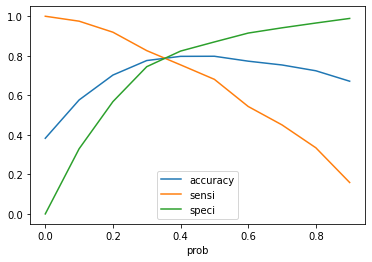

In [90]:
# Plotting accuracy, sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### In analyzing the curve, several observations can be made:

    Accuracy: It stabilizes after reaching 0.35.
    Sensitivity: It decreases as the probability increases.
    Specificity: It increases with the rising probability.
At the point where these three parameters intersect, specifically at 0.35, there appears to be a balance between sensitivity and specificity, resulting in good accuracy. Therefore, 0.35 may be considered as the optimal cutoff point for the analysis.

##### Predicted value with 0.35 probablity cutoff

In [91]:
# Creating a column with name "predicted", which is the predicted value for 0.35 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.896721,3825,1,1,1,1,1,1,1,1,1,0,1
1,1,0.864220,3307,1,1,1,1,1,1,1,1,1,0,1
2,0,0.063436,5527,1,0,0,0,0,0,0,0,0,0,0
3,1,0.534335,5180,1,1,1,1,1,1,0,0,0,0,1
4,1,0.632746,7064,1,1,1,1,1,1,1,0,0,0,1


### Creating Lead Score
Creating a column called `Lead Score` by multplying the converted probablity with 100.

Lead Score = (Converted_Prob) X 100

In [92]:
# Creating Lead Score column
y_train_pred_final['Lead Score'] = round((y_train_pred_final['Converted_Prob']*100))
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
0,0,0.896721,3825,1,1,1,1,1,1,1,1,1,0,1,90.0
1,1,0.864220,3307,1,1,1,1,1,1,1,1,1,0,1,86.0
2,0,0.063436,5527,1,0,0,0,0,0,0,0,0,0,0,6.0
3,1,0.534335,5180,1,1,1,1,1,1,0,0,0,0,1,53.0
4,1,0.632746,7064,1,1,1,1,1,1,1,0,0,0,1,63.0


Indeed, based on the chosen optimal probability cutoff of 0.35, customers with a Lead Score exceeding 35 will be considered as likely to be converted. The decision to set this cutoff implies that a higher Lead Score corresponds to a higher probability of conversion. This approach aims to prioritize leads with a more significant likelihood of conversion, potentially improving the efficiency of the conversion process.

#### Finding the average Lead Score of the predicted converted leads

In [93]:
# Creating dataframe for predicted converted leads
y_train_pred_converted = y_train_pred_final[y_train_pred_final['predicted']==1]
y_train_pred_converted.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
0,0,0.896721,3825,1,1,1,1,1,1,1,1,1,0,1,90.0
1,1,0.864220,3307,1,1,1,1,1,1,1,1,1,0,1,86.0
3,1,0.534335,5180,1,1,1,1,1,1,0,0,0,0,1,53.0
4,1,0.632746,7064,1,1,1,1,1,1,1,0,0,0,1,63.0
5,0,0.356839,6246,1,1,1,1,0,0,0,0,0,0,1,36.0


In [94]:
# Average Lead Score of the predicted converted leads
avg_converted = round(sum(y_train_pred_converted['Lead Score'])/len(y_train_pred_converted.index))
avg_converted

68

We can see that the average Lead Score of the customers, who were `converted` is `68`.

#### Finding the average Lead Score of the predicted not converted leads

In [95]:
# Creating dataframe for predicted not converted leads
y_train_pred_not_converted = y_train_pred_final[y_train_pred_final['predicted']==0]
y_train_pred_not_converted.head()

,Converted,Converted_Prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,Lead Score
2,0,0.063436,5527,1,0,0,0,0,0,0,0,0,0,0,6.0
7,0,0.178858,6908,1,1,0,0,0,0,0,0,0,0,0,18.0
8,0,0.325882,4078,1,1,1,1,0,0,0,0,0,0,0,33.0
11,1,0.319800,4924,1,1,1,1,0,0,0,0,0,0,0,32.0
13,0,0.224798,993,1,1,1,0,0,0,0,0,0,0,0,22.0


In [96]:
# Average Lead Score of the predicted not converted leads
avg_not_converted = round(sum(y_train_pred_not_converted['Lead Score'])/len(y_train_pred_not_converted.index))
avg_not_converted

15

We can see that the average Lead Score of the customers, who were `not converted` is `15`.

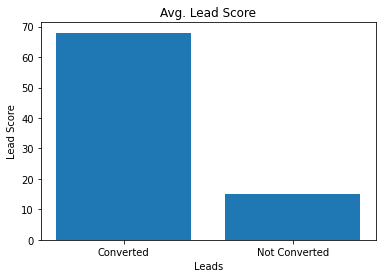

In [97]:
# Bar plot
plt.bar(['Converted', 'Not Converted'], [avg_converted, avg_not_converted])
plt.xlabel('Leads')
plt.ylabel('Lead Score')
plt.title('Avg. Lead Score')
plt.show()

### Confusion Matrix and Accuracy

##### Confusion matrix

In [98]:
# Importing metrics library
from sklearn import metrics

In [99]:
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'])
print(confusion)

[[3041  835]
 [ 499 1904]]


In [100]:
# Predicted        not_converted  converted
# Actual
# not_converted        3372          504
# converted            767           1636  

#### Accuracy

In [101]:
metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['predicted'])

0.7875457875457875

So using the confusion matrix, we got an accuracy of about 79%, which seems to be a good number.

### Sensitivity & Specificity

In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity (Number of correctly predicted YES)

In [103]:
# Let's see the sensitivity
TP / float(TP+FN)

0.7923429047024553

#### Specificity (Number of correctly predicted NOs)

In [104]:
# Let us calculate specificity
TN / float(TN+FP)

0.7845717234262126

#### False postive rate

In [105]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.2154282765737874


#### Positive predictive value 

In [106]:
# positive predictive value 
print (TP / float(TP+FP))

0.6951442132165023


#### Negative predictive value

In [107]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8590395480225989


#### Analysis

So our model seems to have `Good accuracy (~79%)`, `Good specificity (~78%)` and `Good sensitivity (~79%)`.

### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [108]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'], drop_intermediate = False )

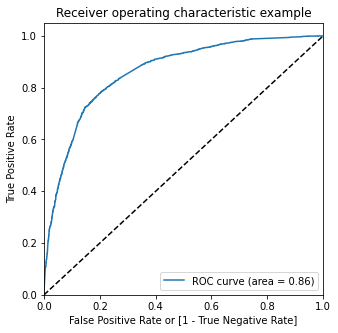

In [110]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

#### Gini of the model
The Gini coefficient of the model, calculated from the area under the ROC curve, is 0.86. This indicates the discriminatory power of the model in distinguishing between positive and negative instances. A higher Gini coefficient suggests a stronger ability to correctly classify instances, and in this case, the ROC curve closely follows the true positive rate axis, emphasizing the model's effectiveness in differentiating between the classes.

## Testing the model

#### Scaling the test set
We only transform the test set.

In [111]:
# Transform the test set
X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
341,0,0.285997,-0.044391,-0.153535,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5449,0,-0.057167,0.924091,0.347591,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6360,0,0.972324,-0.394224,-0.554436,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5091,1,-0.057167,-0.440254,0.347591,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6311,0,-0.057167,-0.670407,0.347591,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [112]:
# Taking only the columns, which are selected in the train set
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website
341,0,-0.044391,0,1,0,0,0,0,0,0,0,1,0,0,0
5449,0,0.924091,0,1,0,0,0,0,0,0,0,1,0,0,0
6360,0,-0.394224,1,0,0,0,0,0,0,0,0,0,0,0,0
5091,1,-0.440254,0,1,0,0,0,0,0,0,0,0,0,0,0
6311,0,-0.670407,0,1,0,0,0,0,0,0,0,0,1,0,0


#### Statsmodel for the test set with the final model log_model_2

In [113]:
# Add constant
X_test_sm = sm.add_constant(X_test)

In [114]:
# Predictions on the test set with the final model log_model_2
y_test_pred = log_model_2.predict(X_test_sm)

In [115]:
y_test_pred.head()

341     0.274496
5449    0.529770
6360    0.346905
5091    0.160412
6311    0.072726
dtype: float64

In [116]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
341,0.274496
5449,0.529770
6360,0.346905
5091,0.160412
6311,0.072726


In [117]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
341,0
5449,0
6360,1
5091,0
6311,0


In [118]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [119]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [120]:
# Appending y_pred_1 and y_test_df
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [121]:
y_pred_final.head()

,Converted,CustID,0
0,0,341,0.274496
1,0,5449,0.529770
2,1,6360,0.346905
3,0,5091,0.160412
4,0,6311,0.072726


In [122]:
# Renaming the '0' column as Converted probablity
y_pred_final = y_pred_final.rename(columns={0:'Converted_Prob'})

In [123]:
# Rearranging the columns 
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_Prob'], axis =1)

In [124]:
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,341,0,0.274496
1,5449,0,0.529770
2,6360,1,0.346905
3,5091,0,0.160412
4,6311,0,0.072726


###### In the test set using 0.35 probablity cutoff, what we got in the train set 

In [125]:
y_pred_final['test_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.35 else 0)

In [126]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,test_predicted
0,341,0,0.274496,0
1,5449,0,0.529770,1
2,6360,1,0.346905,0
3,5091,0,0.160412,0
4,6311,0,0.072726,0


#### Assigning Lead Score

In [127]:
# Creating Lead Score column
y_pred_final['Lead Score'] = round((y_pred_final['Converted_Prob']*100))
y_pred_final.head()

,CustID,Converted,Converted_Prob,test_predicted,Lead Score
0,341,0,0.274496,0,27.0
1,5449,0,0.529770,1,53.0
2,6360,1,0.346905,0,35.0
3,5091,0,0.160412,0,16.0
4,6311,0,0.072726,0,7.0


1. Customers with a Lead Score exceeding 35 will be considered as likely to be converted, given the probability cutoff of 0.35.
2. The likelihood of customers being converted increases with a higher Lead Score.
3. A Lead Score acts as an indicator, and a higher value suggests a greater chance of conversion for the customer.
4. Utilizing a probability cutoff of 0.35 provides a threshold beyond which customers are deemed more probable to convert.

#### Confusion matrix

In [128]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['test_predicted'])
confusion2

array([[1334,  369],
       [ 208,  780]])

In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Accuracy

In [130]:
# Let's check the overall accuracy of the test set
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final['test_predicted'])

0.7855815681902638

#### Sensitivity

In [131]:
# Sensitivity of the test set
TP / float(TP+FN)

0.7894736842105263

#### Sepcificity

In [132]:
# Specificity for the test set
TN / float(TN+FP)

0.7833235466823253

### Conclusion

- Train set
    - Accuracy = 0.79
    - Sensitivity = 0.79
    - Specificity = 0.78
- Test set
    - Accuracy = 0.79
    - Sensitivity = 0.79
    - Specificity = 0.78

In summary, the model demonstrates good performance on the test set, showcasing its ability to generalize effectively from the patterns learned in the training set.